In [ ]:
import sqlite3, config
from arch import arch_model
import numpy as np
import matplotlib.pyplot as plt
from data import SQLRepository, AlphaVantageAPI
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [3]:
av=AlphaVantageAPI()

connection=sqlite3.connect(config.db_name)
repo=SQLRepository(connection=connection)

In [4]:
df_mtn=repo.read_table("MTNOY")

print("MTN type", type(df_mtn))
print("df_mtn shape", df_mtn.shape)
print(df_mtn.info())
df_mtn.head()

MTN type <class 'pandas.core.frame.DataFrame'>
df_mtn shape (4193, 6)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4193 entries, 2024-03-08 to 2007-07-13
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   openning_price  4193 non-null   float64
 1   high_price      4193 non-null   float64
 2   low_price       4193 non-null   float64
 3   closing_price   4193 non-null   float64
 4   trading_volume  4193 non-null   float64
 5   symbol          4193 non-null   object 
dtypes: float64(5), object(1)
memory usage: 229.3+ KB
None


,openning_price,high_price,low_price,closing_price,trading_volume,symbol
date,,,,,,
2024-03-08,4.4900,4.5100,4.4360,4.4558,65834.0,MTNOY
2024-03-07,4.6385,4.6900,4.6100,4.6400,11366.0,MTNOY
2024-03-06,4.6200,4.6500,4.5700,4.5700,37648.0,MTNOY
2024-03-05,4.4300,4.4391,4.3212,4.3800,23753.0,MTNOY
2024-03-04,4.5900,4.6300,4.5800,4.5800,7398.0,MTNOY


In [ ]:
!pip uninstall pandas

In [5]:
df_capitec=repo.read_table("CPI")

print("Capitec type", type(df_capitec))
print("df_mtn shape", df_capitec.shape)
print(df_capitec.info())
df_capitec.head()

Capitec type <class 'pandas.core.frame.DataFrame'>
df_mtn shape (3556, 6)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3556 entries, 2023-12-12 to 2009-10-27
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   openning_price  3556 non-null   float64
 1   high_price      3556 non-null   float64
 2   low_price       3556 non-null   float64
 3   closing_price   3556 non-null   float64
 4   trading_volume  3556 non-null   float64
 5   symbol          3556 non-null   object 
dtypes: float64(5), object(1)
memory usage: 194.5+ KB
None


,openning_price,high_price,low_price,closing_price,trading_volume,symbol
date,,,,,,
2023-12-12,25.6200,25.6200,25.5800,25.6047,567.0,CPI
2023-12-11,25.5900,25.6088,25.5900,25.6088,132.0,CPI
2023-12-08,25.4700,25.5897,25.4700,25.5897,149.0,CPI
2023-12-07,25.5539,25.5539,25.5500,25.5500,1126.0,CPI
2023-12-06,25.4961,25.4961,25.4961,25.4961,91.0,CPI


## closing Price

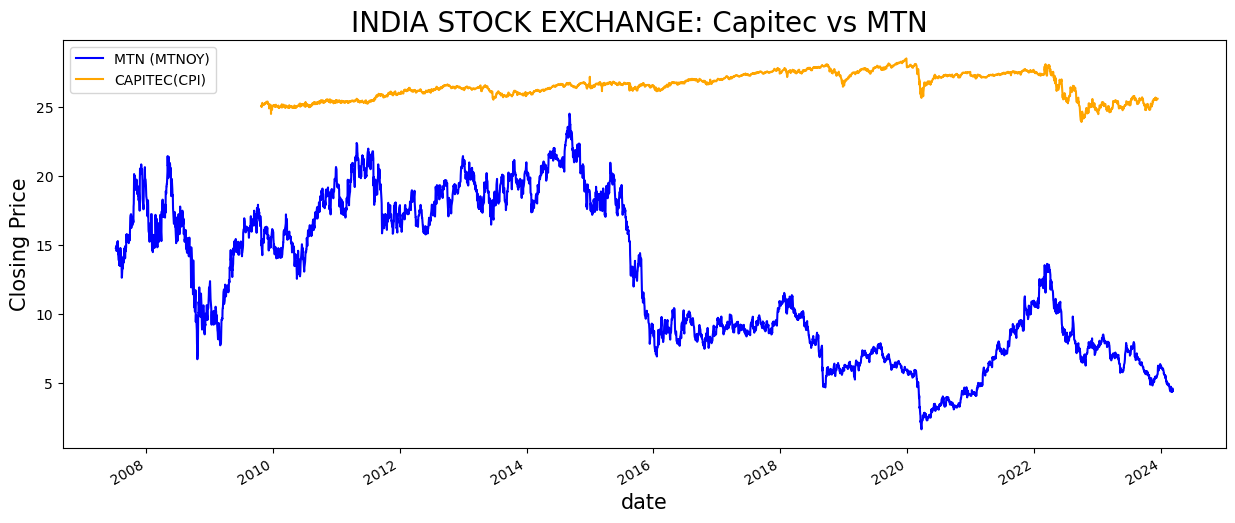

In [6]:
fig, ax = plt.subplots(figsize=(15, 6))
# Plot `df_ambuja` closing price

df_mtn["closing_price"].plot(ax=ax, label="MTN (MTNOY)", color="blue")
df_capitec["closing_price"].plot(ax=ax, label="CAPITEC(CPI)", color="orange")
# Label axes
plt.xlabel("date", size=15)
plt.ylabel("Closing Price", size=15)
plt.title("INDIA STOCK EXCHANGE: Capitec vs MTN ", size=20)
# Add legend
plt.legend();

# Comparing 2 stock price

In [7]:
df_mtn["return"]=df_mtn["closing_price"].pct_change() * 100
df_capitec["return"]=df_capitec["closing_price"].pct_change() * 100

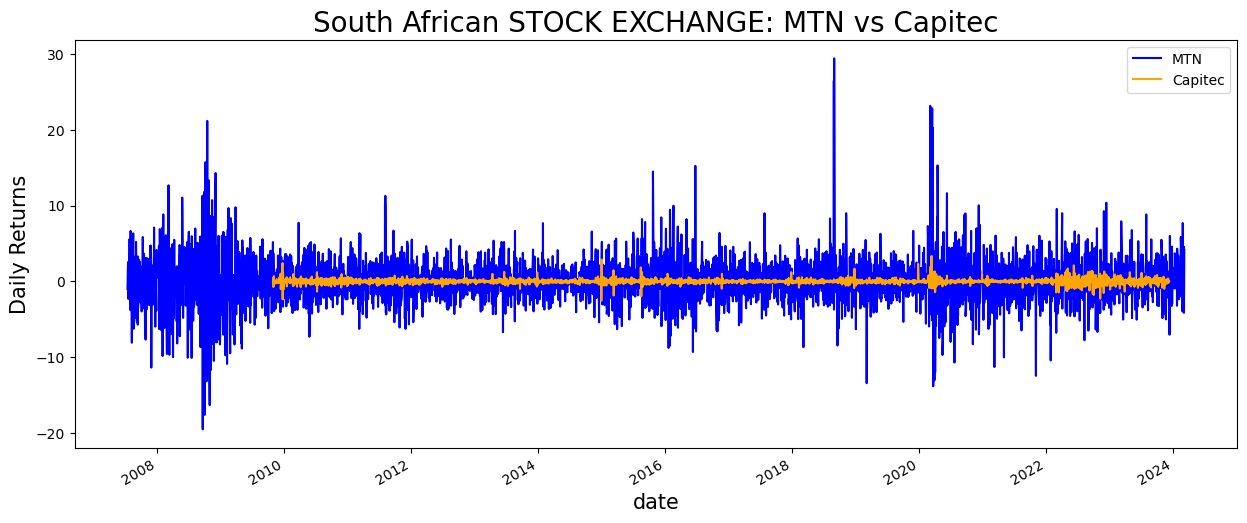

In [21]:
fig, ax = plt.subplots(figsize=(15, 6))
# Plot `df_ambuja` closing price
df_mtn["return"].plot(ax=ax, label="MTN", color="blue")
df_capitec["return"].plot(ax=ax, label="Capitec", color="orange")

# Label axes
plt.xlabel("date", size=15)
plt.ylabel("Daily Returns", size=15)
plt.title("South African STOCK EXCHANGE: MTN vs Capitec", size=20)
# Add legend
plt.legend();

In [22]:
def wrangle(ticker, n_observations):
    '''This method extract table data from the database and calculate returns'''

    df=repo.read_table(ticker, limit = n_observations+1)

    df.sort_index(ascending=True, inplace=True)

    df["returns"]= (df["closing_price"].pct_change()) *100

    return df["returns"].dropna()

In [23]:
y_mtn=wrangle("MTNOY", 2500)

# is "y_naspers" a series?
assert isinstance(y_mtn, pd.Series)

assert len(y_mtn) == 2500

#is the colomn name "returns"
assert y_mtn.name=="returns"

# is the index a datetime index?
assert isinstance(y_mtn.index, pd.DatetimeIndex)

# Is index sorted ascending?
assert all(y_mtn.index == y_mtn.sort_index(ascending=True).index)

In [24]:
y_capitec=wrangle("CPI", 2500)

# is "y_goldfields" a series?
assert isinstance(y_capitec, pd.Series)

assert len(y_capitec) == 2500
 
#is the colomn name "returns"
assert y_capitec.name=="returns"

# is the index a datetime index?
assert isinstance(y_capitec.index, pd.DatetimeIndex)

# Is index sorted ascending?
assert all(y_capitec.index == y_capitec.sort_index(ascending=True).index)

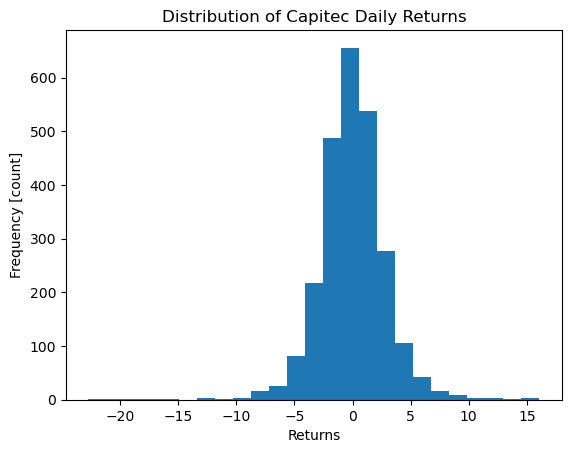

In [25]:
# Create histogram of `y_ambuja`, 25 bins

y_mtn.hist(bins=25, grid=False)
# Add axis labels
plt.xlabel("Returns")
plt.ylabel("Frequency [count]")


# Add title
plt.title("Distribution of Capitec Daily Returns");

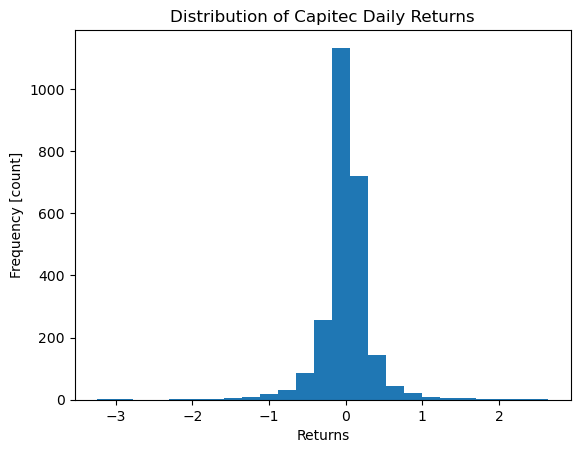

In [26]:
# Create histogram of `y_ambuja`, 25 bins

y_capitec.hist(bins=25, grid=False)
# Add axis labels
plt.xlabel("Returns")
plt.ylabel("Frequency [count]")


# Add title
plt.title("Distribution of Capitec Daily Returns");

In [27]:
mtn_daily_volatility = y_mtn.std()
capitec_daily_volatility = y_capitec.std()

print("MTN Daily Volatility:", mtn_daily_volatility)
print("Capitec Daily Volatility:", capitec_daily_volatility)

MTN Daily Volatility: 2.94370222839903
Capitec Daily Volatility: 0.3326087396713249


MTN stock is more volatile than Capitec stock when compaing them on daily returns. Calculating volatility on annual return:

In [28]:
mtn_annual_volatility = y_mtn.std()*np.sqrt(252)
capitec_annual_volatility = y_capitec.std()*np.sqrt(252)

print("MTN Annual Volatility:", mtn_annual_volatility)
print("Capitec Annual Volatility:", capitec_annual_volatility)

MTN Annual Volatility: 46.72982418102294
Capitec Annual Volatility: 5.280000054341694


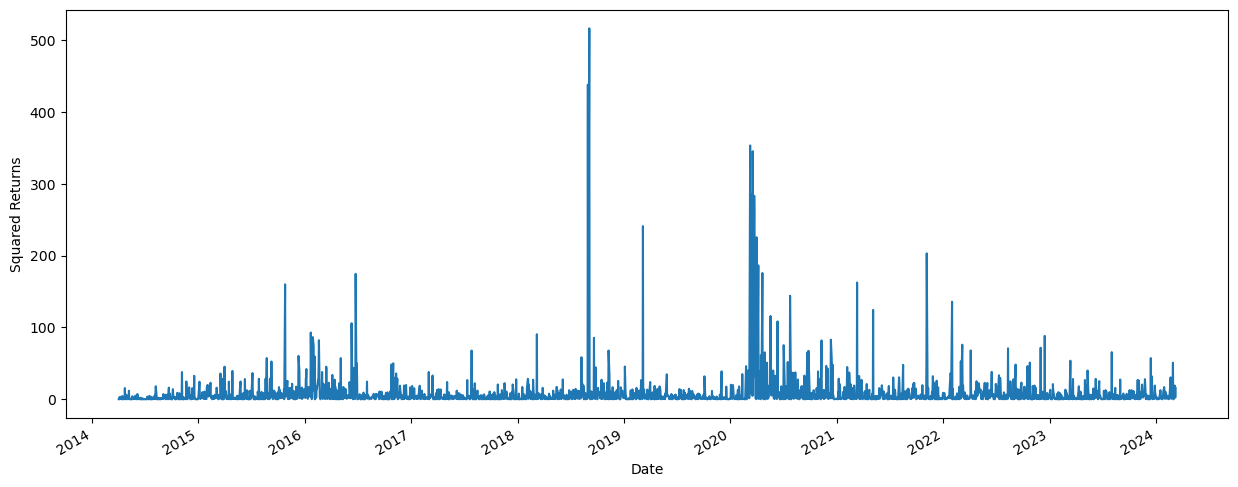

In [34]:
fig, ax = plt.subplots(figsize=(15, 6))

# Plot squared returns

(y_mtn**2).plot(ax=ax)

# Add axis labels
plt.xlabel("Date")
plt.ylabel("Squared Returns");

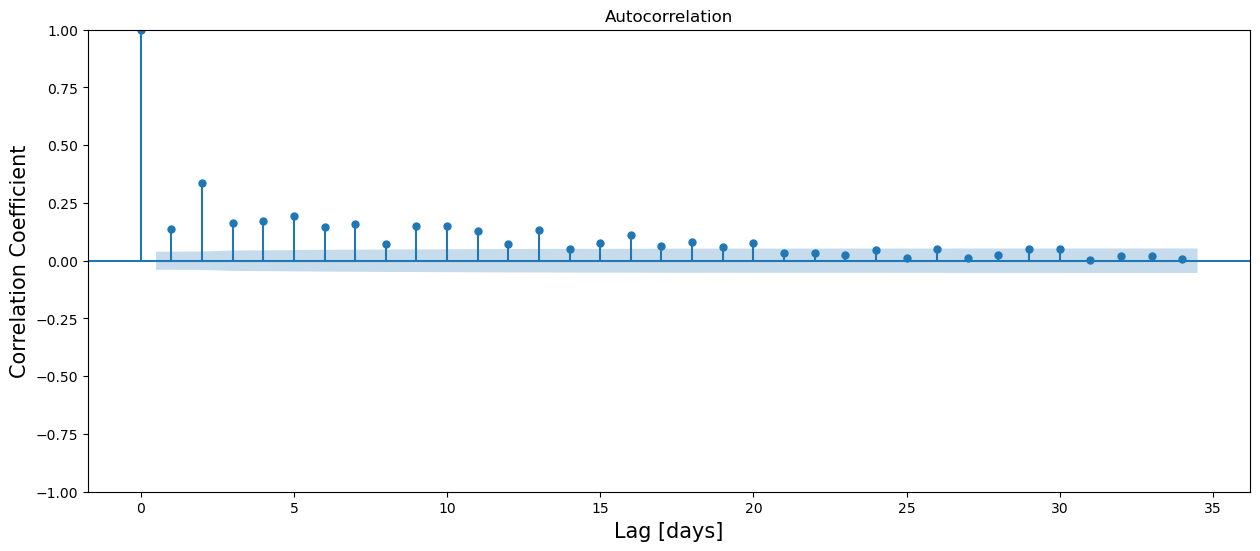

In [35]:
fig, ax =plt.subplots(figsize=(15, 6))
plot_acf(y_mtn ** 2, ax=ax)
plt.xlabel("Lag [days]", size=15)
plt.ylabel("Correlation Coefficient", size=15);

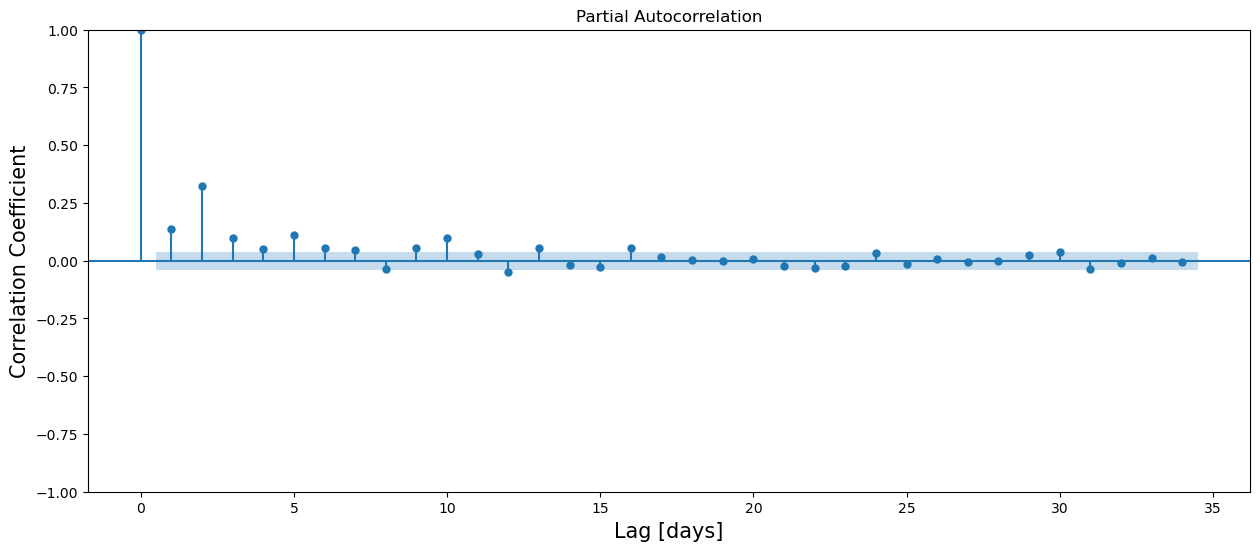

In [36]:
fig, ax =plt.subplots(figsize=(15, 6))
plot_pacf(y_mtn**2, ax=ax)
plt.xlabel("Lag [days]", size=15)
plt.ylabel("Correlation Coefficient", size=15);

predictive power at most 5 Lags.

## splitting data

In [37]:
cutoff_test=round(len(y_mtn)*0.8)
cutoff_test

2000

In [38]:
# using 80% of the dataset for training
y_mtn_train=y_mtn.iloc[:cutoff_test]
print("y_mtn_train shape:", y_mtn_train.shape)

y_mtn_train shape: (2000,)


# Iterate

In [39]:
model=arch_model(y_mtn_train, p=5, q=5).fit(disp=0)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4839.78
Distribution:                  Normal   AIC:                           9703.57
Method:            Maximum Likelihood   BIC:                           9770.78
                                        No. Observations:                 2000
Date:                Mon, Mar 11 2024   Df Residuals:                     1999
Time:                        17:35:18   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0383  5.923e-02      0.647      0.518 [-7.779e-02,  0.154]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.4728      0.265      1.787  7.395e-02   [-4.578e-02,  0.991]
alpha[1]       0.1153  5.526e-02      2.087  3.687e-02    [7.032e-03,  0.224]
alpha[2]       0.0639  5.193e-02      1.231      0.218   [-3.785e-02,  0.166]
alpha[3]       0.0118  3.752e-02      0.314      0.754 [-6.175e-02,8.531e-02]
alpha[4]   6.3745e-03  6.146e-02      0.104      0.917      [ -0.114,  0.127]
alpha[5]       0.0491  6.752e-02      0.728      0.467   [-8.319e-02,  0.181]
beta[1]        0.0000      0.363      0.000      1.000      [ -0.711,  0.711]
beta[2]        0.0000      0.375      0.000      1.000      [ -0.736,  0.736]
beta[3]        0.0000      0.321      0.000      1.000      [ -0.629,  0.629]
beta[4]        0.3140      0.258      1.217      0.224      [ -0.192,  0.819]
beta[5]        0.3980      0.193      2.066  3.882e-02    [2.044e-02,  0.776]
=============================================================================

Covariance estimator: robust
"""

In [40]:
model=arch_model(y_mtn_train, p=3, q=3).fit(disp=0)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4844.67
Distribution:                  Normal   AIC:                           9705.34
Method:            Maximum Likelihood   BIC:                           9750.14
                                        No. Observations:                 2000
Date:                Mon, Mar 11 2024   Df Residuals:                     1999
Time:                        17:35:27   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0276  5.754e-02      0.480      0.631 [-8.517e-02,  0.140]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.2850      0.184      1.551      0.121   [-7.506e-02,  0.645]
alpha[1]       0.1000  4.657e-02      2.148  3.169e-02    [8.771e-03,  0.191]
alpha[2]       0.0476  6.292e-02      0.757      0.449   [-7.569e-02,  0.171]
alpha[3]   8.8830e-13  3.876e-02  2.292e-11      1.000 [-7.597e-02,7.597e-02]
beta[1]        0.2724      0.504      0.540      0.589      [ -0.716,  1.261]
beta[2]        0.0000      0.213      0.000      1.000      [ -0.417,  0.417]
beta[3]        0.5550      0.329      1.686  9.186e-02   [-9.030e-02,  1.200]
=============================================================================

Covariance estimator: robust
"""

In [41]:
model=arch_model(y_mtn_train, p=1, q=1).fit(disp=0)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4849.03
Distribution:                  Normal   AIC:                           9706.07
Method:            Maximum Likelihood   BIC:                           9728.47
                                        No. Observations:                 2000
Date:                Mon, Mar 11 2024   Df Residuals:                     1999
Time:                        17:35:32   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0236  5.693e-02      0.415      0.678 [-8.796e-02,  0.135]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1385  7.565e-02      1.831  6.712e-02 [-9.764e-03,  0.287]
alpha[1]       0.0696  2.118e-02      3.284  1.022e-03  [2.805e-02,  0.111]
beta[1]        0.9183  2.468e-02     37.207 5.165e-303    [  0.870,  0.967]
===========================================================================

Covariance estimator: robust
"""

Even though omega is not statistical significant but the other terms are great, the model is ok :)

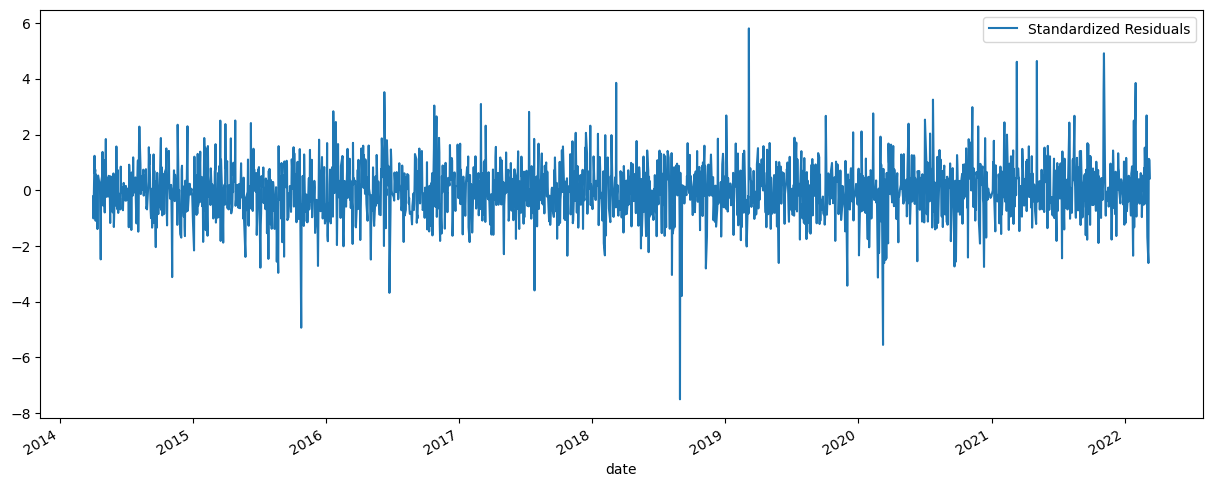

In [42]:
# plotting the model standardized residuals
fig, ax=plt.subplots(figsize=(15,6))
model.std_resid.plot(ax=ax, label="Standardized Residuals")
plt.legend();

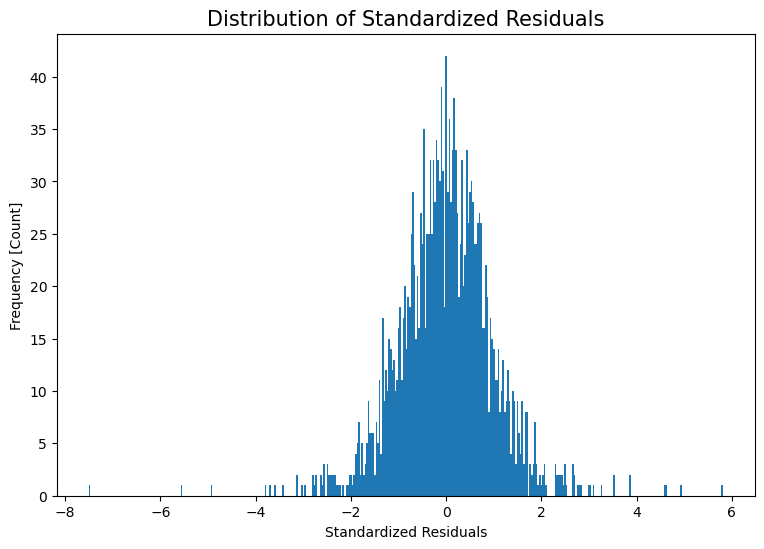

In [43]:
fig, ax=plt.subplots(figsize=(9,6))
model.std_resid.hist(bins=400, grid=False, ax=ax)
plt.xlabel("Standardized Residuals")
plt.ylabel("Frequency [Count]")
plt.title("Distribution of Standardized Residuals", size=15);

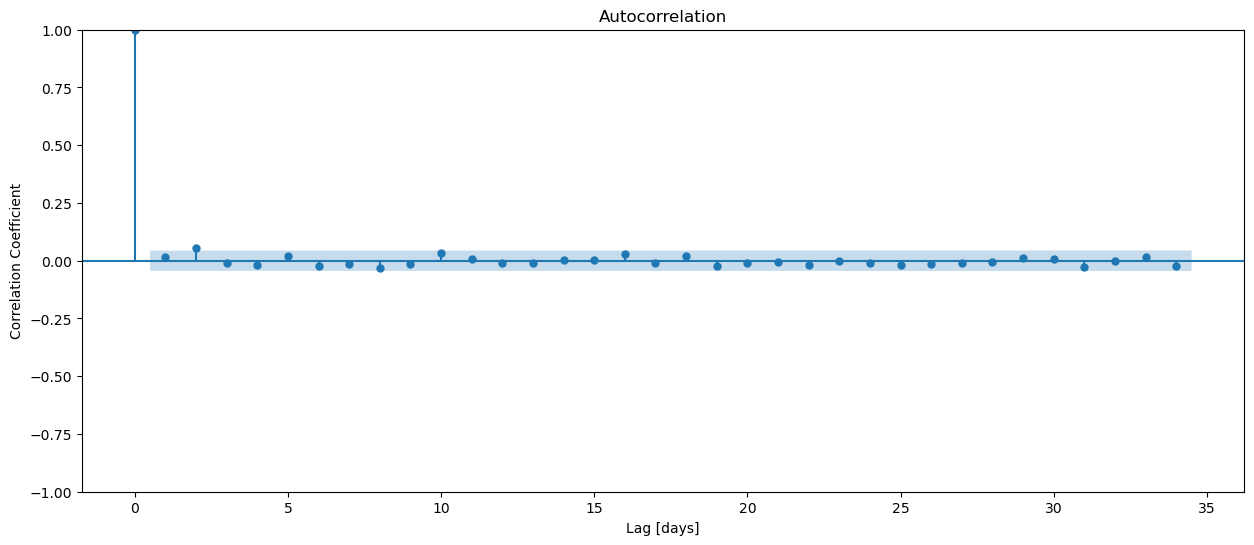

In [44]:
fig, ax = plt.subplots(figsize=(15, 6))

# Create ACF of squared, standardized residuals
plot_acf(model.std_resid**2, ax=ax)

# Add axis labels
plt.xlabel("Lag [days]")
plt.ylabel("Correlation Coefficient");

No remaining time correltions yeyi! everything is insignificant.

## Model Evaluation

In [47]:
# the list will hold predictins
predictions=[]

test_size=int(len(y_mtn_train)*0.2)

# walk forward validation
for i in range(test_size):
    y_train =y_mtn.iloc[:-(test_size -i)]
    
    # Train model
    model = arch_model(y_train, p=1, q=1, rescale=False).fit(disp=0)
    
    # Generate next prediction (volatility, not variance)
    next_pred = model.forecast(horizon=1, reindex=False).variance.iloc[0,0]**0.5

    predictions.append(next_pred)
    
y_test_wfv=pd.Series(predictions, index=y_mtn.tail(test_size).index)

print("y_test_wfv type:", type(y_test_wfv))
print("y_test_wfv shape:", y_test_wfv.shape)
y_test_wfv.head()     

y_test_wfv type: <class 'pandas.core.series.Series'>
y_test_wfv shape: (400,)


date
2022-08-05    2.431961
2022-08-08    2.454932
2022-08-09    2.423493
2022-08-10    2.387457
2022-08-11    2.324987
dtype: float64